In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


In [56]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [57]:
df.shape

(4026, 7)

In [58]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [60]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffness Et (MS)',
       'Period (P)'],
      dtype='object')

In [61]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [62]:
#标签
y=normalized_df["Period (P)"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

In [64]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import optuna.integration.lightgbm as oplgb
from catboost import CatBoostRegressor

In [65]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [66]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor(
        iterations=1188,
        learning_rate=0.1688649945042702,
        depth=6,
        l2_leaf_reg=0.5745035778636723,
        random_seed=42,
        loss_function='RMSE',
        eval_metric='RMSE'
    )
cat_reg.fit(X_train, y_train)
#Results via optuna

0:	learn: 0.1884447	total: 1.47ms	remaining: 1.75s
1:	learn: 0.1625454	total: 2.81ms	remaining: 1.67s
2:	learn: 0.1400485	total: 3.92ms	remaining: 1.55s
3:	learn: 0.1210541	total: 5.03ms	remaining: 1.49s
4:	learn: 0.1049990	total: 6.08ms	remaining: 1.44s
5:	learn: 0.0915679	total: 7.04ms	remaining: 1.39s
6:	learn: 0.0797272	total: 8.46ms	remaining: 1.43s
7:	learn: 0.0710228	total: 9.5ms	remaining: 1.4s
8:	learn: 0.0618713	total: 10.4ms	remaining: 1.36s
9:	learn: 0.0548780	total: 11.2ms	remaining: 1.32s
10:	learn: 0.0486973	total: 12.1ms	remaining: 1.29s
11:	learn: 0.0440896	total: 13ms	remaining: 1.27s
12:	learn: 0.0393291	total: 13.9ms	remaining: 1.26s
13:	learn: 0.0352598	total: 14.8ms	remaining: 1.24s
14:	learn: 0.0317832	total: 15.7ms	remaining: 1.23s
15:	learn: 0.0293062	total: 16.7ms	remaining: 1.22s
16:	learn: 0.0269586	total: 17.6ms	remaining: 1.21s
17:	learn: 0.0248361	total: 18.5ms	remaining: 1.2s
18:	learn: 0.0232610	total: 19.4ms	remaining: 1.19s
19:	learn: 0.0216966	total:

187:	learn: 0.0030699	total: 183ms	remaining: 974ms
188:	learn: 0.0030650	total: 184ms	remaining: 974ms
189:	learn: 0.0030547	total: 185ms	remaining: 973ms
190:	learn: 0.0030469	total: 186ms	remaining: 971ms
191:	learn: 0.0030314	total: 187ms	remaining: 970ms
192:	learn: 0.0030212	total: 188ms	remaining: 969ms
193:	learn: 0.0030145	total: 189ms	remaining: 968ms
194:	learn: 0.0030072	total: 190ms	remaining: 967ms
195:	learn: 0.0029969	total: 191ms	remaining: 965ms
196:	learn: 0.0029800	total: 192ms	remaining: 965ms
197:	learn: 0.0029674	total: 193ms	remaining: 964ms
198:	learn: 0.0029557	total: 194ms	remaining: 963ms
199:	learn: 0.0029459	total: 195ms	remaining: 961ms
200:	learn: 0.0029368	total: 196ms	remaining: 961ms
201:	learn: 0.0029277	total: 197ms	remaining: 960ms
202:	learn: 0.0029201	total: 198ms	remaining: 960ms
203:	learn: 0.0029121	total: 199ms	remaining: 959ms
204:	learn: 0.0029056	total: 200ms	remaining: 958ms
205:	learn: 0.0028994	total: 201ms	remaining: 957ms
206:	learn: 

380:	learn: 0.0019595	total: 369ms	remaining: 783ms
381:	learn: 0.0019563	total: 371ms	remaining: 782ms
382:	learn: 0.0019537	total: 372ms	remaining: 781ms
383:	learn: 0.0019460	total: 373ms	remaining: 780ms
384:	learn: 0.0019422	total: 374ms	remaining: 780ms
385:	learn: 0.0019402	total: 375ms	remaining: 779ms
386:	learn: 0.0019373	total: 376ms	remaining: 778ms
387:	learn: 0.0019352	total: 377ms	remaining: 777ms
388:	learn: 0.0019322	total: 378ms	remaining: 776ms
389:	learn: 0.0019227	total: 379ms	remaining: 775ms
390:	learn: 0.0019199	total: 380ms	remaining: 774ms
391:	learn: 0.0019180	total: 381ms	remaining: 773ms
392:	learn: 0.0019134	total: 382ms	remaining: 773ms
393:	learn: 0.0019115	total: 383ms	remaining: 772ms
394:	learn: 0.0019086	total: 384ms	remaining: 771ms
395:	learn: 0.0019070	total: 385ms	remaining: 770ms
396:	learn: 0.0019042	total: 386ms	remaining: 769ms
397:	learn: 0.0019002	total: 387ms	remaining: 768ms
398:	learn: 0.0018984	total: 388ms	remaining: 767ms
399:	learn: 

582:	learn: 0.0015377	total: 564ms	remaining: 585ms
583:	learn: 0.0015366	total: 565ms	remaining: 585ms
584:	learn: 0.0015347	total: 566ms	remaining: 584ms
585:	learn: 0.0015340	total: 567ms	remaining: 583ms
586:	learn: 0.0015320	total: 568ms	remaining: 582ms
587:	learn: 0.0015296	total: 569ms	remaining: 581ms
588:	learn: 0.0015287	total: 570ms	remaining: 580ms
589:	learn: 0.0015269	total: 571ms	remaining: 579ms
590:	learn: 0.0015260	total: 573ms	remaining: 578ms
591:	learn: 0.0015244	total: 574ms	remaining: 578ms
592:	learn: 0.0015200	total: 575ms	remaining: 577ms
593:	learn: 0.0015189	total: 576ms	remaining: 576ms
594:	learn: 0.0015175	total: 577ms	remaining: 575ms
595:	learn: 0.0015165	total: 578ms	remaining: 574ms
596:	learn: 0.0015161	total: 579ms	remaining: 573ms
597:	learn: 0.0015150	total: 580ms	remaining: 572ms
598:	learn: 0.0015139	total: 581ms	remaining: 571ms
599:	learn: 0.0015128	total: 582ms	remaining: 570ms
600:	learn: 0.0015119	total: 583ms	remaining: 569ms
601:	learn: 

773:	learn: 0.0013520	total: 744ms	remaining: 398ms
774:	learn: 0.0013505	total: 746ms	remaining: 397ms
775:	learn: 0.0013502	total: 746ms	remaining: 396ms
776:	learn: 0.0013497	total: 747ms	remaining: 395ms
777:	learn: 0.0013484	total: 748ms	remaining: 394ms
778:	learn: 0.0013478	total: 749ms	remaining: 393ms
779:	learn: 0.0013469	total: 750ms	remaining: 392ms
780:	learn: 0.0013462	total: 751ms	remaining: 391ms
781:	learn: 0.0013446	total: 752ms	remaining: 391ms
782:	learn: 0.0013442	total: 753ms	remaining: 390ms
783:	learn: 0.0013433	total: 754ms	remaining: 389ms
784:	learn: 0.0013427	total: 755ms	remaining: 388ms
785:	learn: 0.0013414	total: 756ms	remaining: 387ms
786:	learn: 0.0013410	total: 757ms	remaining: 386ms
787:	learn: 0.0013399	total: 758ms	remaining: 385ms
788:	learn: 0.0013393	total: 759ms	remaining: 384ms
789:	learn: 0.0013390	total: 760ms	remaining: 383ms
790:	learn: 0.0013381	total: 761ms	remaining: 382ms
791:	learn: 0.0013378	total: 762ms	remaining: 381ms
792:	learn: 

961:	learn: 0.0012531	total: 931ms	remaining: 219ms
962:	learn: 0.0012530	total: 932ms	remaining: 218ms
963:	learn: 0.0012523	total: 933ms	remaining: 217ms
964:	learn: 0.0012512	total: 935ms	remaining: 216ms
965:	learn: 0.0012509	total: 936ms	remaining: 215ms
966:	learn: 0.0012504	total: 937ms	remaining: 214ms
967:	learn: 0.0012502	total: 938ms	remaining: 213ms
968:	learn: 0.0012498	total: 940ms	remaining: 212ms
969:	learn: 0.0012489	total: 941ms	remaining: 211ms
970:	learn: 0.0012485	total: 942ms	remaining: 211ms
971:	learn: 0.0012480	total: 943ms	remaining: 210ms
972:	learn: 0.0012473	total: 945ms	remaining: 209ms
973:	learn: 0.0012471	total: 946ms	remaining: 208ms
974:	learn: 0.0012468	total: 947ms	remaining: 207ms
975:	learn: 0.0012466	total: 948ms	remaining: 206ms
976:	learn: 0.0012461	total: 949ms	remaining: 205ms
977:	learn: 0.0012458	total: 950ms	remaining: 204ms
978:	learn: 0.0012453	total: 952ms	remaining: 203ms
979:	learn: 0.0012451	total: 953ms	remaining: 202ms
980:	learn: 

In [67]:
y_pred= cat_reg.predict(X_test)
y_pred1=cat_reg.predict(X_val)
y_pred2=cat_reg.predict(X_train)

In [68]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.00127144509049857
mean_squared_error: 4.447789602984712e-06
rmse: 0.0021089783315588408
r2 score: 0.9999107923031522


In [69]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.00046441433189459613
mean_squared_error: 1.3960283753628107e-06
rmse: 0.0011815364469041194
r2 score: 0.9999714602893142


In [70]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.0014089494746147395
mean_squared_error: 1.369040715611874e-05
rmse: 0.0037000550206880358
r2 score: 0.9997327692793445


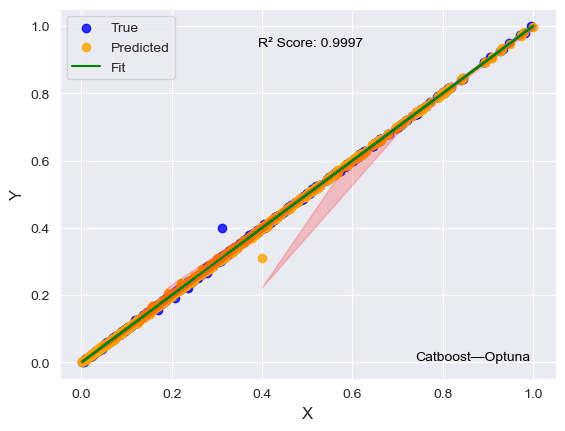

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
r2 = r2_score(y_test, y_pred)
slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test
sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'Catboost—Optuna', transform=plt.gca().transAxes, ha='right', color='black')
plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()

In [72]:
X_ori=df.drop("Period (P)" ,axis=1)
y_ori=df["Period (P)"]

In [73]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=0.2, random_state=99)

X_train_ori, X_val_ori, y_train_ori, y_val_ori = train_test_split(X_train_ori, y_train_ori, test_size=0.25, random_state=99)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
import lime.lime_tabular
import shap

In [75]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [84]:
j = 8
exp = explainer.explain_instance(X_test_ori.values[j],cat_reg.predict, num_features=6)

Intercept 0.276105949157772
Prediction_local [0.29726903]
Right: 0.1596581750672072


In [85]:
# Show the predictions
exp.show_in_notebook(show_table=True)

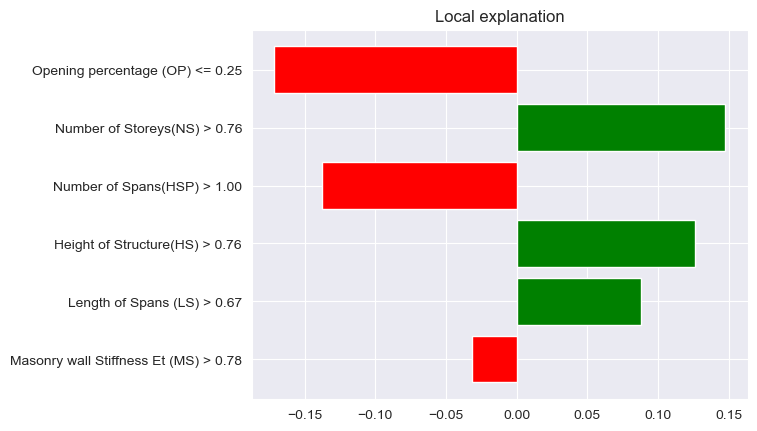

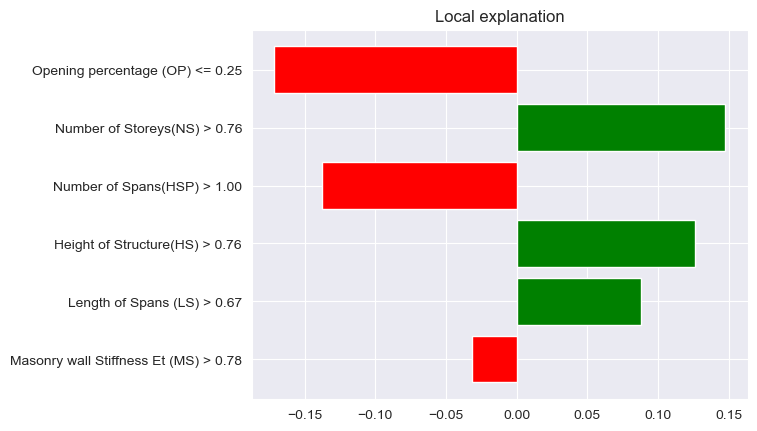

In [86]:
exp.as_pyplot_figure()

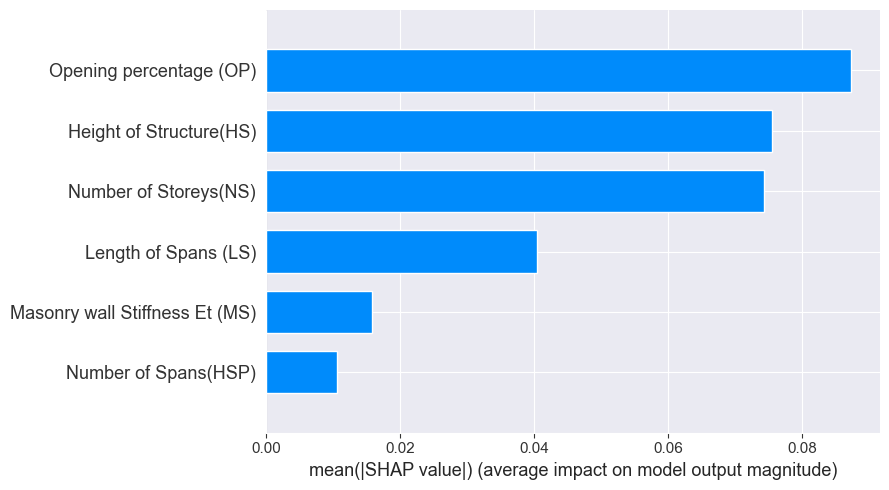

In [79]:
import shap
shap_values = shap.TreeExplainer(cat_reg).shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar",plot_size=(9,5))

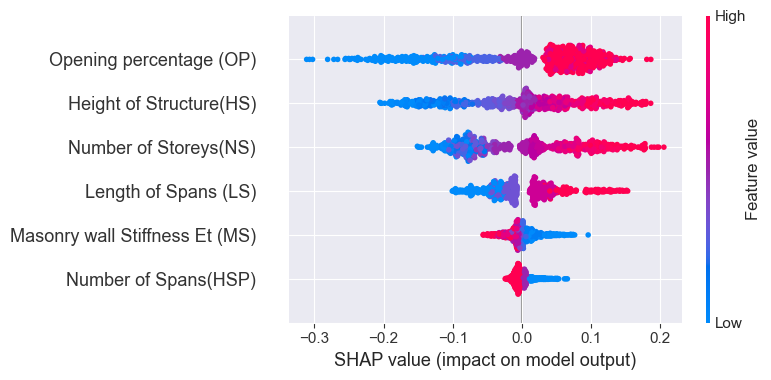

In [80]:

shap.summary_plot(shap_values, X_test)

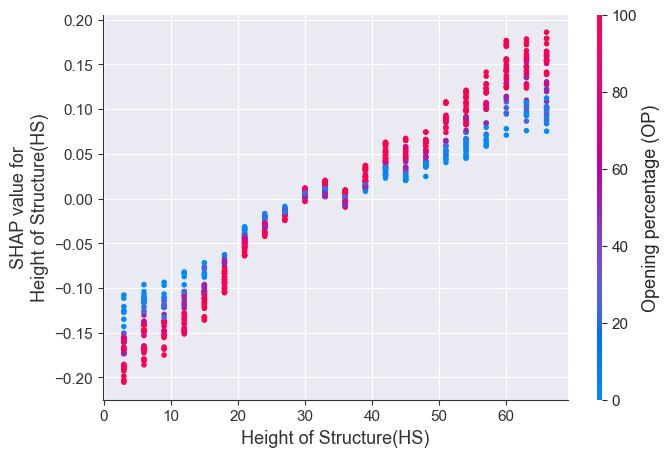

In [81]:
shap.dependence_plot('Height of Structure(HS)',shap_values,X_test_ori)

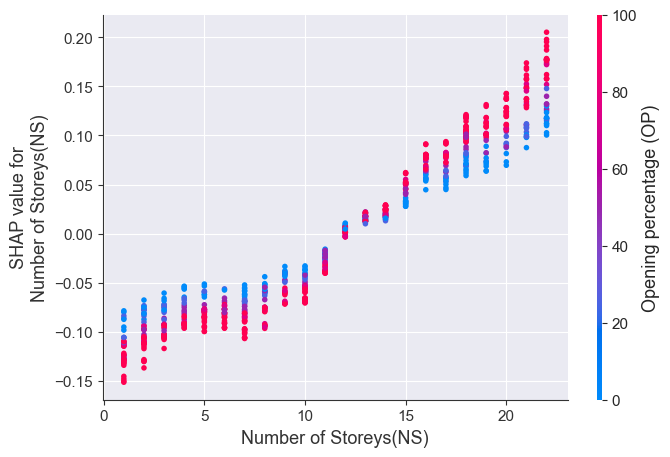

In [82]:
shap.dependence_plot('Number of Storeys(NS)',shap_values,X_test_ori)

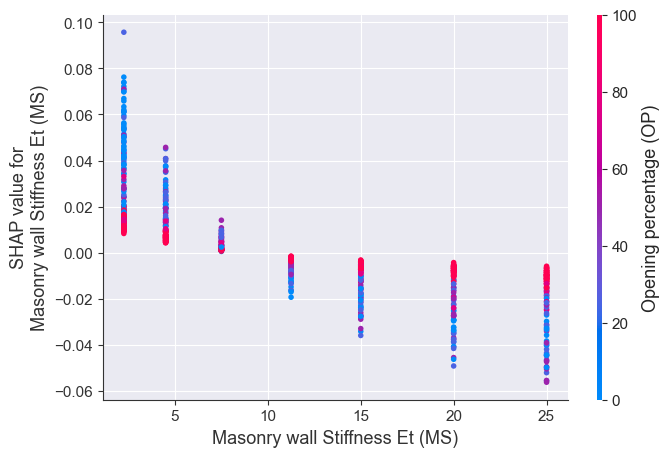

In [83]:
shap.dependence_plot('Masonry wall Stiffness Et (MS)',shap_values,X_test_ori)

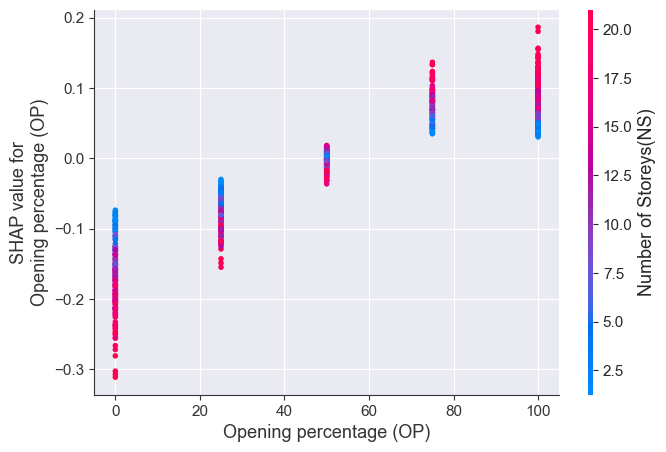

In [32]:
shap.dependence_plot('Opening percentage (OP)',shap_values,X_test_ori)

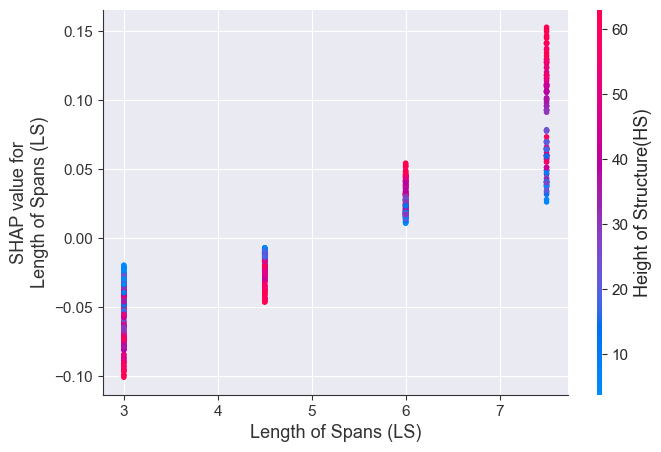

In [33]:
shap.dependence_plot('Length of Spans (LS)',shap_values,X_test_ori)

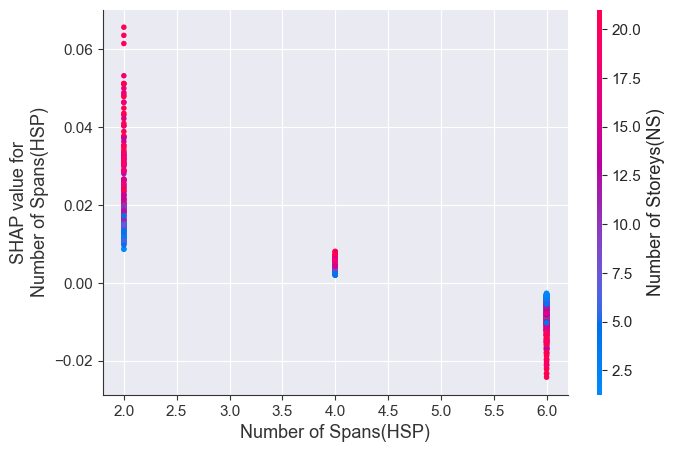

In [34]:
shap.dependence_plot('Number of Spans(HSP)',shap_values,X_test_ori)

In [35]:
import shap
shap.initjs()

In [36]:
explainer = shap.TreeExplainer(cat_reg)
shap_values = explainer.shap_values(X_test_ori)

In [37]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

,0,1,2,3,4,5
801,0.191034,0.173283,-0.015418,0.151257,0.186299,-0.015341
802,0.191034,0.173283,-0.015418,0.151257,0.186299,-0.015341
803,0.191034,0.173283,-0.015418,0.151257,0.186299,-0.015341
804,0.191034,0.173283,-0.015418,0.151257,0.186299,-0.015341
805,0.191034,0.173283,-0.015418,0.151257,0.186299,-0.015341


In [38]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  0.30166450125972954


In [39]:
shap.force_plot(explainer.expected_value, shap_values[8,:], X_test_ori.iloc[8,:])

In [40]:
shap.force_plot(explainer.expected_value, shap_values[10,:], X_test_ori.iloc[10,:])

In [41]:
import shap
import json 
shap.initjs()

In [42]:

explainer = shap.Explainer(cat_reg)
shap_values = explainer(X_test_ori)

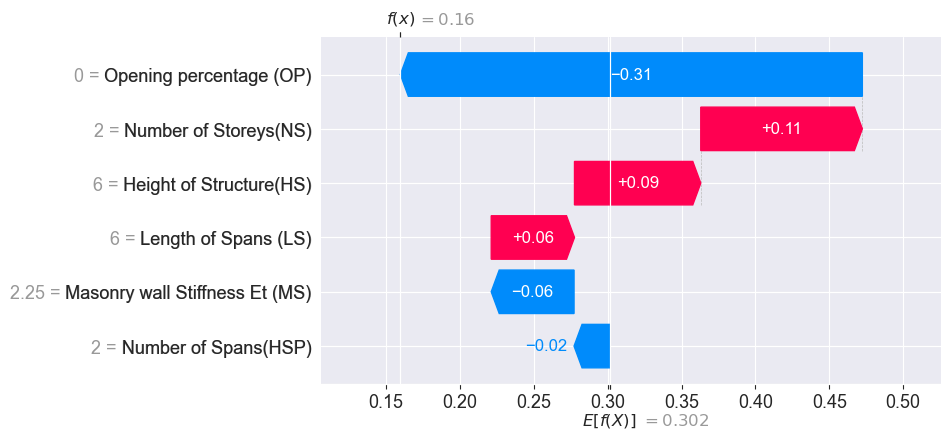

In [43]:

shap.plots.waterfall(shap_values[8])

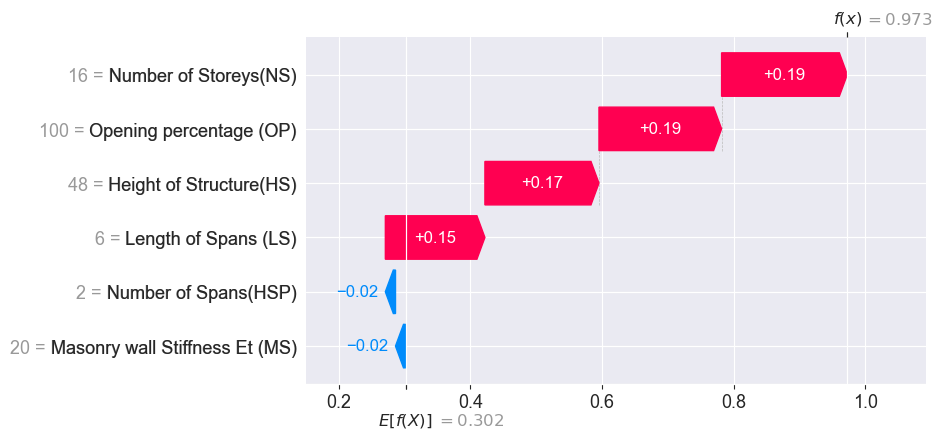

In [44]:

shap.plots.waterfall(shap_values[10])

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.ensemble import xgboost
from sklearn.inspection import PartialDependenceDisplay as pdp
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [46]:
from time import time

In [47]:
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 99,
}

Computing partial dependence plots and individual conditional expectation...
done in 3.944s


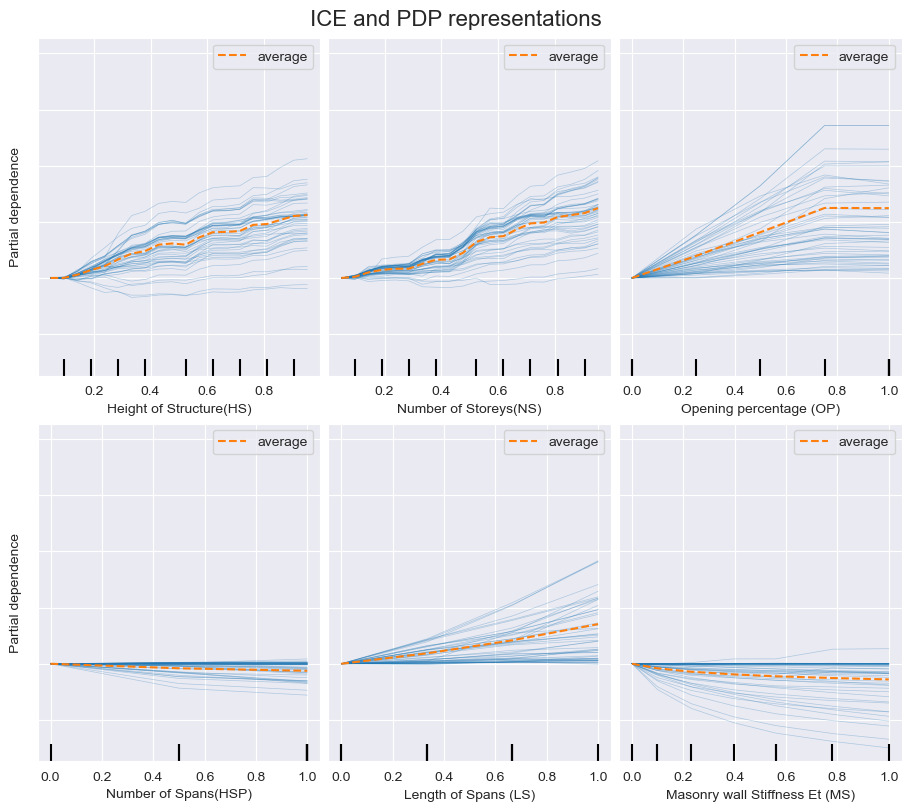

In [49]:
print("Computing partial dependence plots and individual conditional expectation...")
tic = time()
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 8), sharey=True, constrained_layout=True)

features_info = {
    "features": ["Height of Structure(HS)","Number of Storeys(NS)" ,"Opening percentage (OP)","Number of Spans(HSP)","Length of Spans (LS)","Masonry wall Stiffness Et (MS)"],
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    cat_reg,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)